# Review

<font color='grey'><b>Hey there Nadav! My name is Maxim, and I will be reviewing your project. I've put all my comments into markdown cells with different background colors.</b></font>

<div class="alert alert-success" role="alert">
  If you did something great I'll be using green color for my comment.
</div>

<div class="alert alert-warning" role="alert">
Yellow cell means it is an optional recommendation -- like when I think something can be improved, or simply offer an advice for your future work.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work before I can accept it then the color will be red
</div>

<div class="alert alert-info" role="alert">
  If you'd want to leave your own comment or ask a question or anything: use this cell style, so it would be easier for me to notice in the text  and adress it ;)
</div>

<font color='grey'><b>I left my overall impressions and conclusions at the end of this cell.</b></font>

<font color='grey'><b>And, please! Do not delete my comments in further iterations of your project (if there would be any).</b></font>

## Summary #1
<font color='purple'><b>Very good presentation skills with some interesting solutions, an extremely thorough analysis with lots of additional research, solid conclusions and correct calculations.
<br> 
I left just a couple of yellow notes regarding the conclusions and presentation -- but other that that I think this is a very strong project. Good job!
<br>
With that said, I'm accepting it and wish you the best of luck in your future studies! =)
<br>
<br>
Cheers!
    </b></font>

# Business Analytics Project - Yandex.Afisha 

<div class="alert alert-success" role="alert">
Excellent idea to add TOC! I like it =)
</div>

## Table of Contents


### **[Download the data and prepare it for analysis](#1)**

 [Visits data](#11)

 [Orders data](#12)
 
 [Costs data](#13)
 
 
### **[Make reports and calculate metrics](#2)**     

#### **[1. Product](#21)**    
 
 [How many people use it every day, week, and month?](#211)
     
 [How many sessions are there per day?](#212)
 
 [What is the length of each session?](#213)

 [How often do users come back?](#214) 
  
  
#### **[2. Sales](#22)**

 [When do people start buying?](#221)
     
 [How many orders do they make during a given period of time?](#222)
 
 [What is the average purchase size?](#223)

 [How much money do they bring? (LTV)](#224) 


#### **[3. Marketing](#23)**

 [How much money was spent? Overall/per source/over time? ](#231)
     
 [How much did customer acquisition from each of the sources cost? (CAC)](#232)
 
 [How worthwhile where the investments? (ROI)](#233)

### **[Overall Conclusion](#4)**     

 

<a class="anchor" id="1"></a>
## Download the data and prepare it for analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from functools import reduce
from scipy import stats as st
import plotly.express as px

# downlodating files with correct data types following info() analysis

try: 
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype ={'Device': 'category'}, parse_dates = ['Start Ts', 'End Ts'])
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')
except:
    visits = pd.read_csv('visits_log_us.csv', dtype ={'Device': 'category'}, parse_dates = ['Start Ts', 'End Ts'])
    orders = pd.read_csv('orders_log_us.csv')
    costs = pd.read_csv('costs_us.csv')  



<a class="anchor" id="11"></a>
### Visits data

In [3]:
# visits info
display(visits.head())
display(visits.info(memory_usage='deep'))

# lowercase
visits.columns = map(str.lower, visits.columns)

# display source id values 
display(visits['source id'].value_counts())

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


None

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source id, dtype: int64

##### Conclusions

- visits contain 359400 rows.
- 9 source id values
- converted columns at upload: End Ts - date; Start Ts - date; Decice - category.
- after convertions at upload stage - memory usage drop from 79.3 to 11.3 MB.

<div class="alert alert-success" role="alert">
Solid initial analysis =)
</div>

<a class="anchor" id="12"></a>
### Orders data

In [4]:
# orders info
display(orders.head(5))
display(orders.info(memory_usage = 'deep'))

# lower case
orders.columns = map(str.lower, orders.columns)

# data to convert - Buy Ts - date.
orders['buy ts'] = pd.to_datetime(orders['buy ts'], format = "%Y-%m-%d %H:%M")





Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


None

<a class="anchor" id="13"></a>
### Costs data

In [5]:
# costs info
display(costs.head(5))
display(costs.info(memory_usage = 'deep'))

# convert dt to time data type
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


None

<a class="anchor" id="2"></a>
## Make reports and calculate metrics

<a class="anchor" id="21"></a>
### 1. Product
- How many people use it every day, week, and month?
- How many sessions are there per day? (One user might have more than one session.)
- What is the length of each session?
- How often do users come back?

<a class="anchor" id="211"></a>
#### - How many people use it every day, week, and month?

In [6]:
# calculate DAU, WAU, MAU

# make columns for each datetime type: day (date), week, month
visits['session_date'] = visits['start ts'].dt.date
visits['session_week'] = visits['start ts'].dt.week
visits['session_month'] = visits['start ts'].dt.month
visits['session_year'] = visits['start ts'].dt.year



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



<AxesSubplot:xlabel='session_date'>

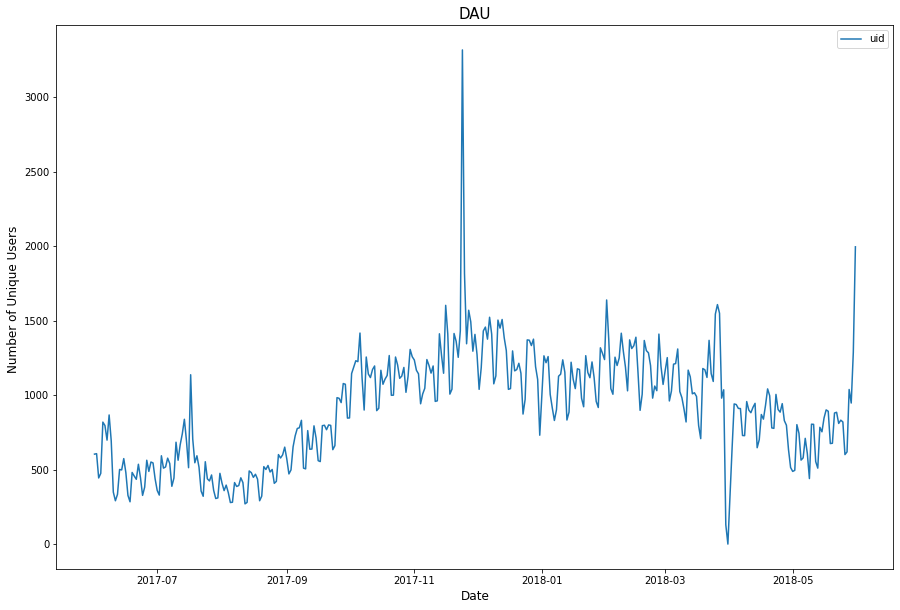

In [7]:
# DAU: groupby session date
dau = visits.groupby(['session_date']).agg({'uid': 'nunique'}).reset_index()

# plot DAU line graph
display(dau.plot(kind = 'line', x='session_date', y='uid', figsize = (15,10)))
plt.title("DAU", fontdict = {'size':15})
plt.ylabel("Number of Unique Users ",fontdict = {'size':12})
plt.xlabel("Date", fontdict = {'size':12})

display(px.line(dau, x = 'session_date', y = 'uid'))
plt.show()

##### Conclusions:
- High pick in DAU at Nov 24 2017, due to significant events: Black Friday (Nov 24), Thanksgiving (Nov 23).
- Reason for the drop at DAU on March 30 unverified. 

<div class="alert alert-success" role="alert">
Very nice! =)
</div>

Text(0.5, 0, 'Week Number')

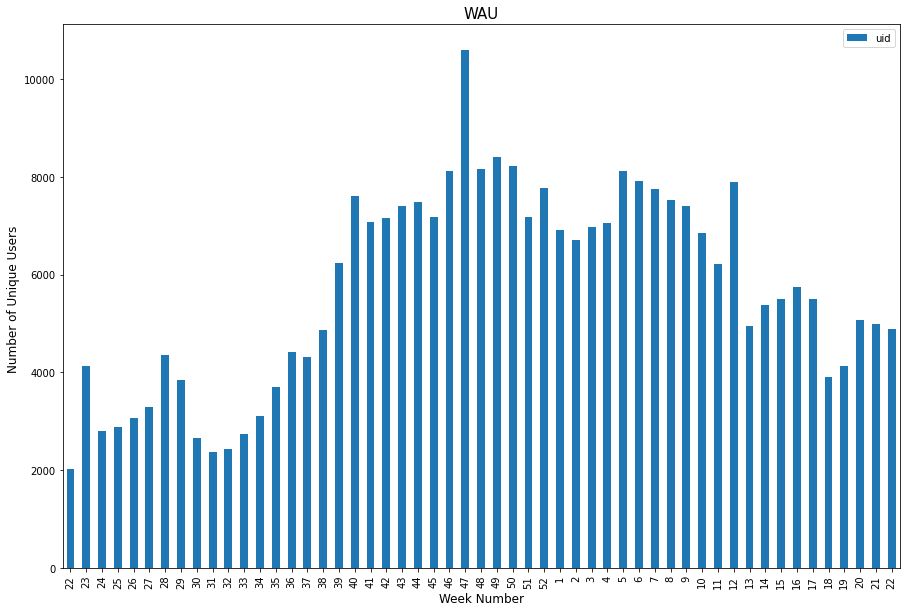

In [8]:
# WAU: groupby session week
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
# plot WAU bar graph
wau.plot(kind = 'bar', x='session_week', y='uid', figsize = (15,10))
plt.title("WAU", fontdict = {'size':15})
plt.ylabel("Number of Unique Users ",fontdict = {'size':12})
plt.xlabel("Week Number", fontdict = {'size':12})


##### Conclusions:
- WAU correlates the trends of DAU, with lower resolution.
- The best way to look at user activity in this case, is the DAU, as it allows to pin point special events.

<div class="alert alert-success" role="alert">
Pretty cool!
</div>

<div class="alert alert-warning" role="alert">
Though, one minor note: if you claim a correlation between two plotted lines it usually makes sense to plot them on the same figure =)
<br>
Of course, DAU and WAU have different value magnitude -- but you can fix that by normalizing one of the values towards the other ;)
</div>

Text(0.5, 0, 'Month')

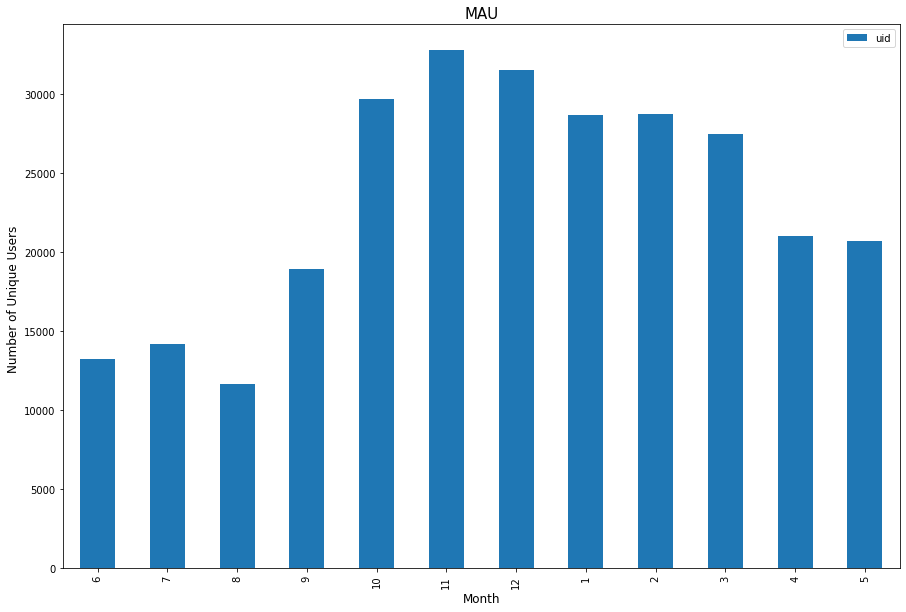

In [9]:

# MAU: gropuby session month 
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()

# plot MAU bar graph
mau.plot(kind = 'bar', x='session_month', y='uid', figsize = (15,10))
plt.title("MAU", fontdict = {'size':15})
plt.ylabel("Number of Unique Users ",fontdict = {'size':12})
plt.xlabel("Month", fontdict = {'size':12})


##### Conclusions

- MAU correlates the trends of DAU and WAU, with lower resolution.


<div class="alert alert-warning" role="alert">
Same minor note here. Otherwise -- nice job =)
</div>

<a class="anchor" id="212"></a>
#### - How many sessions are there per day? (One user might have more than one session.)

uid    907.991758
dtype: float64

uid_count    987.362637
dtype: float64

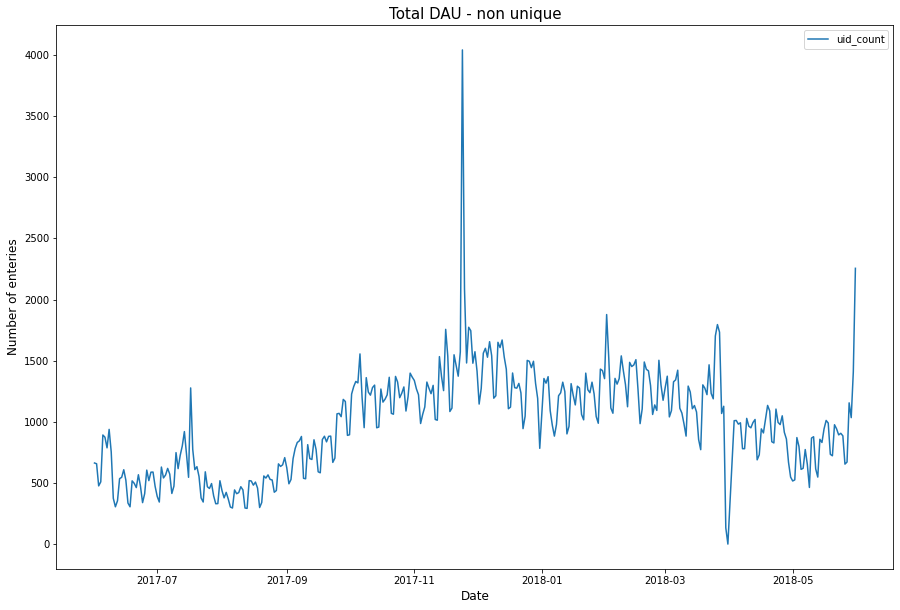

In [10]:
# DAU count

# group visits by session_date, an count the number of users in each date
dau_count = visits.groupby(['session_date'])['uid'].count().reset_index()

# rename column for uid count
dau_count = dau_count.rename(columns = {'uid' : 'uid_count'})

# plot DAU_count line graph
px.line(dau_count, x= 'session_date', y='uid_count')

dau_count.plot(kind = 'line', x='session_date', y='uid_count', figsize = (15,10))
plt.title("Total DAU - non unique", fontdict = {'size':15})
plt.ylabel("Number of enteries",fontdict = {'size':12})
plt.xlabel("Date", fontdict = {'size':12})


# avg user count per day
display(dau.mean() ,dau_count.mean())

##### conclusions:

- We see that the total dau count shows a similar pattern for dau of unique users, only with slighly larger numbers. For example: at the peak of November 24, 2017: ~3500 count of unique users, which did overall of ~ 4000 sessions.

- dau unique mean: 907.9 ; dau count mean: 987.3

In [11]:
# compare uid_uniuqe and uid_count on daily basis

# merge dau with dau count
dau_merge = pd.merge(dau, dau_count, on = 'session_date')

# rename 
dau_merge = dau_merge.rename(columns = {'uid' : 'uid_unique'})

# calculate the avg sessions of users each day
dau_merge['avr_session_per_user'] = dau_merge['uid_count'] / dau_merge['uid_unique']

display(dau_merge.head(5))

# calculatet the total avg user session per day
dau_merge['avr_session_per_user'].mean()

session_date  uid_unique  uid_count  avr_session_per_user
0   2017-06-01         605        664              1.097521
1   2017-06-02         608        658              1.082237
2   2017-06-03         445        477              1.071910
3   2017-06-04         476        510              1.071429
4   2017-06-05         820        893              1.089024

1.0821696440039723

##### Conclusions:

- We see that the total_dau_count and unique_dau count is similar on daily basis: The relation to one another is a~ 1.0

<div class="alert alert-success" role="alert">
Perfect!
</div>

Text(0.5, 0, 'Date')

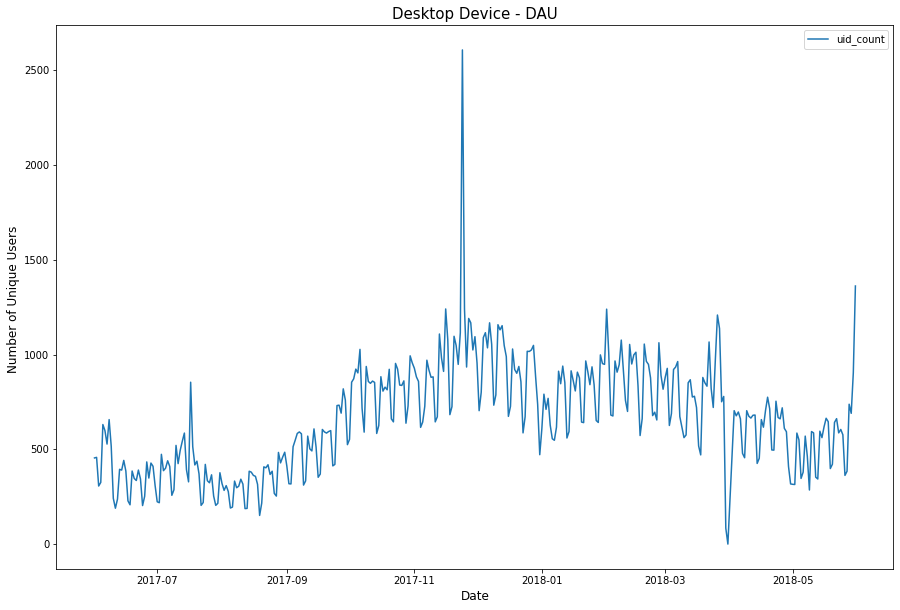

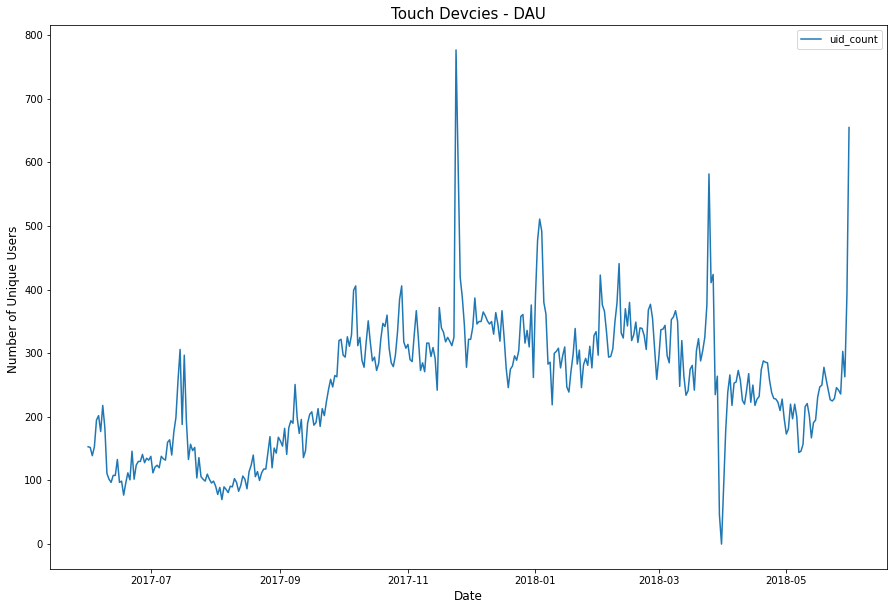

In [12]:
# calculate dau by device

# group by device: number of unique users in each device in each day
dau_unique_device = visits.groupby(['device', 'session_date'])['uid'].nunique().reset_index()

# rename
dau_unique_device = dau_unique_device.rename(columns = {'uid' : 'uid_count'})

# display dau of unique users, by desktop
dau_unique_device[dau_unique_device['device'] == 'desktop'].plot(kind = 'line', x= 'session_date', y='uid_count', figsize = (15,10))
plt.title("Desktop Device - DAU", fontdict = {'size':15})
plt.ylabel("Number of Unique Users ",fontdict = {'size':12})
plt.xlabel("Date", fontdict = {'size':12})


# display dau of unique users, by touch devices
dau_unique_device[dau_unique_device['device'] == 'touch'].plot(kind = 'line', x= 'session_date', y='uid_count', figsize = (15,10))
plt.title("Touch Devcies - DAU", fontdict = {'size':15})
plt.ylabel("Number of Unique Users ",fontdict = {'size':12})
plt.xlabel("Date", fontdict = {'size':12})



##### Conclusions:

- DAU is ~ 3 times higher from Desktop users then from Touch device users.

<a class="anchor" id="213"></a>
#### - What is the length of each session?

In [13]:
# calculate session length for all rows
visits['session_length'] = visits['end ts'] - visits['start ts']

# mean session length
display('mean session time:', visits.session_length.mean())

# mean session length for desktop users
display('mean session time for desktop users:', visits[visits['device'] == 'desktop']['session_length'].mean())
# mean session length for touch users
display('mean session time for desktop users:', visits[visits['device'] == 'touch']['session_length'].mean())

'mean session time:'

Timedelta('0 days 00:10:43.025687256')

'mean session time for desktop users:'

Timedelta('0 days 00:11:43.288859605')

'mean session time for desktop users:'

Timedelta('0 days 00:07:59.619406607')

##### Conclusions:

- The average session length time is 00:10:43
- The average sessoin length is shorter for Desktop users compare to Touch users: 00:07:59 and 00:10:43, respectively.

<div class="alert alert-success" role="alert">
Yep, that makes sense =)
</div>

<a class="anchor" id="214"></a>
#### - How often do users come back?

<AxesSubplot:title={'center':'Visits Cohorts: User Retention'}, xlabel='cohort_lifetime_month', ylabel='first_session_month'>

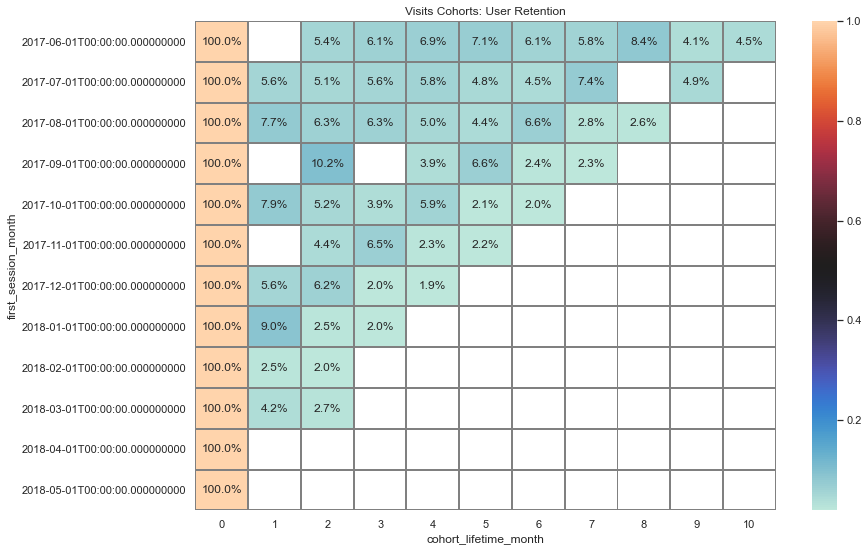

In [14]:
# calculate Retention 

# create a series: group users by first sessions date
first_session_date = visits.groupby(['uid'])['start ts'].min()   # first_visit_date
first_session_date.name = 'first_session_date' # first_visit_date

# merge visits with first_session_date
visits_cohort = visits.join(first_session_date, on = 'uid')

# add seesion month date 
visits_cohort['session_month_date'] = visits_cohort['session_date'].astype('datetime64[M]')

# month first session month date
visits_cohort['first_session_month'] = visits_cohort['first_session_date'].astype('datetime64[M]')

# calculate user cohort lifetime - month
visits_cohort['cohort_lifetime_month'] = visits_cohort['session_month_date'] - visits_cohort['first_session_month'] 
visits_cohort['cohort_lifetime_month'] = visits_cohort['cohort_lifetime_month'] / np.timedelta64(1, 'M')
visits_cohort['cohort_lifetime_month'] = visits_cohort['cohort_lifetime_month'].astype(int)

# group the data by first_session_week/month  and cohort lifetime week/month, and calculate the number of unique users in each cohort
visits_cohorts_month = visits_cohort.groupby(['first_session_month', 'cohort_lifetime_month']).agg({'uid':'nunique'}).reset_index()

# retrieve the initial number of users in a cohort and divide it by the number of users for each subsequent week/month
initial_users_count_month = visits_cohorts_month[visits_cohorts_month['cohort_lifetime_month'] == 0][['first_session_month','uid']]

# rename column
initial_users_count_month = initial_users_count_month.rename(columns = {'uid':'cohort_users'}) 

# merge visits cohorts with initial_users_count
visits_cohorts_month = visits_cohorts_month.merge(initial_users_count_month,on = 'first_session_month') 

# divide the number of active users in each week by the initial number of users in the cohort
visits_cohorts_month['retention'] = visits_cohorts_month['uid'] / visits_cohorts_month['cohort_users']

# compile a pivot table
retention_pivot_month = visits_cohorts_month.pivot_table(index='first_session_month',columns='cohort_lifetime_month',values='retention',aggfunc='sum')

# plot heatmap for monthly cohorts
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Visits Cohorts: User Retention')
sns.heatmap(retention_pivot_month, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='icefire')



##### Conclusions:

- We see retention rate is about ~5-6% in all cohorts.
- The retention rate decrease steadly towards the last lifetime month in each cohort.
- As the year progress, each new cohort shows lower retention at its last updated lifetime, Dropping from 4.5% and 4.9% at the first 2 cohorts, to ~2.0% in the last cohorts

<div class="alert alert-success" role="alert">
Ok, numbers look good and conclusions are quite solid too =)
</div>

<a class="anchor" id="22"></a>
### 2. Sales
- When do people start buying? 
- How many orders do they make during a given period of time?
- What is the average purchase size?
- How much money do they bring? (LTV)

<a class="anchor" id="221"></a>
#### - When do people start buying?

array([[<AxesSubplot:title={'center':'conversion_days'}>]], dtype=object)

'Percent of conversions at day0 or day1: 27005 total, 73.9%'

'Percent of conversions between day2-day7 : 2331 total, 6.4%'

'Percent of conversions between day8-day30s: 2253 total, 6.2%'

'Percent of conversions after day30: 4934 total, 13.5%'

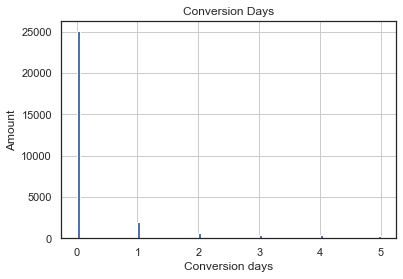

In [15]:
# Calculate Conversion

# groupby uid series, by first order date
orders_first_date = orders.groupby(['uid']).agg({'buy ts': 'min'}).reset_index()
 
# groupby uid series, by first visit date
first_session_date = visits.groupby(['uid']).agg({'start ts':'min'}).reset_index()

# merge the two tables
orders_visits = pd.merge(orders_first_date, first_session_date, on = 'uid')

# change types
orders_visits['start ts'] = orders_visits['start ts'].dt.date
orders_visits['buy ts'] = orders_visits['buy ts'].dt.date

# rename columns
orders_visits = orders_visits.rename(columns = {'uid' : 'uid_unique', 'buy ts' : 'first_order', 'start ts' : 'first_visit' })

# calculate conversion
orders_visits['conversion_days'] = orders_visits['first_order'] - orders_visits['first_visit']

# convert timedelta64[ns] to int for plot
orders_visits['conversion_days'] = orders_visits['conversion_days'].astype('timedelta64[D]')

# change o or nan values to 0 
orders_visits.loc[ (orders_visits['conversion_days'] < 0) | (orders_visits['conversion_days'].isnull()), 'conversion_days' ] = 0 

# display conversion days histogram 
display(orders_visits.hist('conversion_days', range = (0, 5), bins = 100))
plt.title('Conversion Days')
plt.ylabel("Amount",fontdict = {'size':12})
plt.xlabel("Conversion days", fontdict = {'size':12})


# calculate conversion rates
convert_0_days = len(orders_visits[orders_visits['conversion_days'] <= 1])
convert_1_7_days = len(orders_visits.query(('1 < conversion_days <= 7')))
convert_8_30_days = len(orders_visits.query(('conversion_days > 7 and conversion_days <= 30')))
convert_30plus_days = len(orders_visits.query(('conversion_days > 30')))

# display the results
display(
        'Percent of conversions at day0 or day1: {:} total, {:.1%}'.format(convert_0_days, convert_0_days/len(orders_visits)),
        'Percent of conversions between day2-day7 : {:} total, {:.1%}'.format(convert_1_7_days, convert_1_7_days/len(orders_visits)),
        'Percent of conversions between day8-day30s: {:} total, {:.1%}'.format(convert_8_30_days, convert_8_30_days/len(orders_visits)),
        'Percent of conversions after day30: {:} total, {:.1%}'.format(convert_30plus_days, convert_30plus_days/len(orders_visits))   
       )


##### Conclusions

- Out of total conversion - 73.9% are done at day0 and day1.
- More then 10% of the conversion are made after the first month. 

<div class="alert alert-success" role="alert">
Ok, everything is in order here, but...
</div>

<div class="alert alert-warning" role="alert">
Your histogram looks a bit like a haircomb -- which isn't very informative. I would recommend to reduce the number of bins slightly -- for most dataframes 100 is usually an overkill. 20-30 should be more appropriate.
<br>
Also, try to use a logarithmic OY scale and see if it looks any better ;) 
</div>

<AxesSubplot:title={'center':'Conversions Cohorts'}, xlabel='conversion_lifetime', ylabel='first_visit_month'>

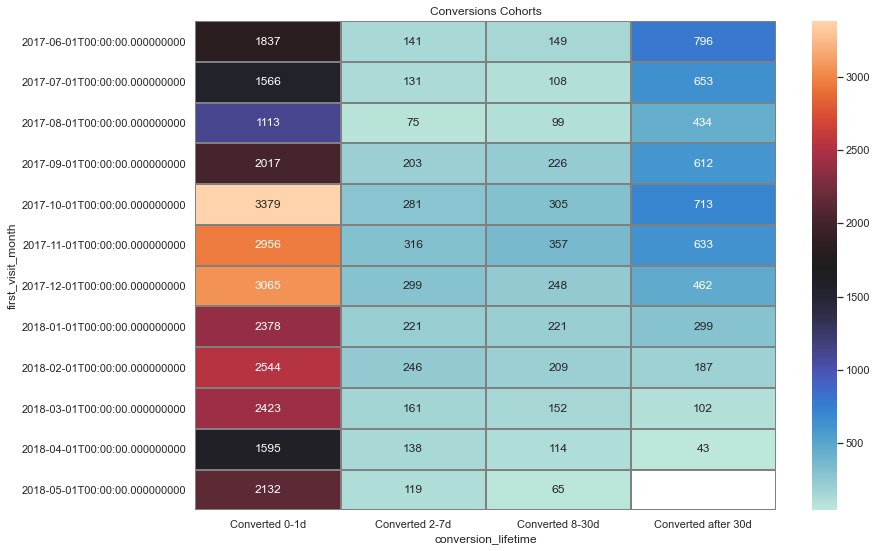

In [16]:
# calculate converstion rate by cohorts

# convert conversion days to int values
orders_visits['conversion_days'] = orders_visits['conversion_days'].astype('int')


# month first session month date
orders_visits['first_visit_month'] = orders_visits['first_visit'].astype('datetime64[M]')


# split to lifetime by conversion days
def conversion_category_row(row):
    if row['conversion_days'] <= 1 :
        return "Converted 0-1d"
    elif row['conversion_days'] > 1 and row['conversion_days'] <= 7 :
        return "Converted 2-7d"
    elif row['conversion_days'] > 7 and row['conversion_days'] <= 30:
        return 'Converted 8-30d'
    elif row['conversion_days'] > 30 :
        return 'Converted after 30d'
    else:
        return 'Never converted'

    
# add conversion days lifetime to each row    
orders_visits['conversion_lifetime'] = orders_visits.apply(lambda row: conversion_category_row(row), axis = 1)

# group by first_visit_month cohorts with conversion_lifetime
orders_visits_grouped_by_cohorts = orders_visits.groupby(['first_visit_month', 'conversion_lifetime']).agg({'uid_unique':'count'}).reset_index()

# pivot table
orders_visits_grouped_by_cohorts_pivot = orders_visits_grouped_by_cohorts.pivot_table(index='first_visit_month',columns='conversion_lifetime',values='uid_unique') 

# plot heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Conversions Cohorts')
sns.heatmap(orders_visits_grouped_by_cohorts_pivot, annot=True, fmt='g', linewidths=1, linecolor='gray', cmap='icefire')


##### Conclusions:

- The strongest months are October, November and December, with over 3000 conversion users at the days 0-1.
- All months cohorts shows similar decrease pattern.
- Looking at the first two months cohorts, we can confidently detarmine that the number of users converted after 30 days are less then half from the users who convert at the first two days. 


<div class="alert alert-success" role="alert">
Oh wow, that's impressive! I love the idea with conversion categories! Looks very elegant and informative at the same time =) 
</div>


<AxesSubplot:title={'center':'Conversions Cohorts'}, xlabel='conversion_lifetime', ylabel='first_visit_month'>

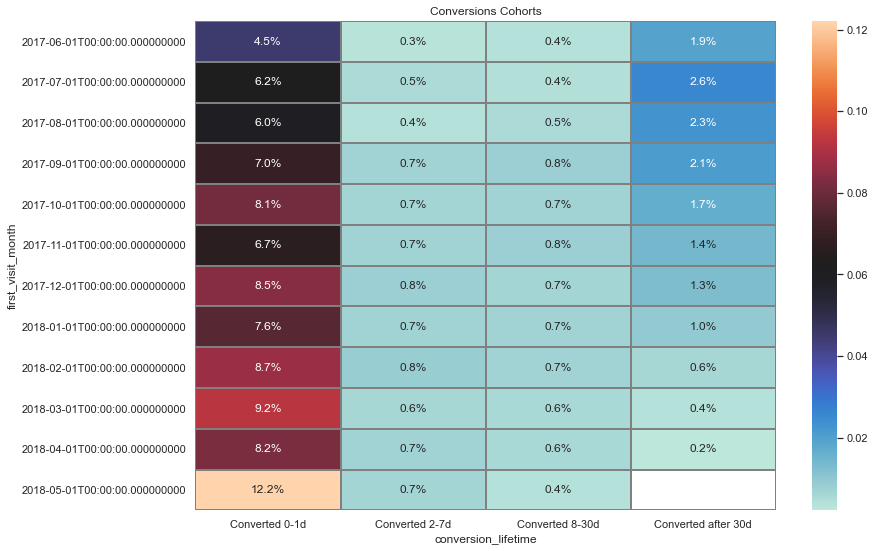

In [17]:
# Now, We will calculate conversion rate

# count the amount of total visits in each month
first_visit_total = visits_cohort.groupby('first_session_month')['uid'].count().reset_index()
first_visit_total = first_visit_total.rename(columns = {'first_session_month' : 'first_visit_month', 'uid' : 'total_users_in_cohort'})

# group the cohorts with total visits for each cohort
orders_visits_grouped_by_cohorts_conversion_rate = pd.merge(orders_visits_grouped_by_cohorts, first_visit_total, on = 'first_visit_month')

# calcualte conversion rate for each cohort
orders_visits_grouped_by_cohorts_conversion_rate['conversion_rate'] = orders_visits_grouped_by_cohorts_conversion_rate['uid_unique'] / orders_visits_grouped_by_cohorts_conversion_rate['total_users_in_cohort']

# pivot table 
orders_visits_grouped_by_cohorts_conversion_rate_pivot = orders_visits_grouped_by_cohorts_conversion_rate.pivot_table(index = 'first_visit_month', columns = 'conversion_lifetime', values = 'conversion_rate')

# plot heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Conversions Cohorts')
sns.heatmap(orders_visits_grouped_by_cohorts_conversion_rate_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='icefire')


##### Conclusions:

- There is a steady increase in coversion rates of day0 and day1, from 4.5% in the first cohort to over 12% in the last cohort. 

- Conversion rate drops to below 1% in the other conversion lifetime. 

- Similar to the total conversions we see in the previous heatmap and precentages, almost all conversions are done at day0 and day1.


<div class="alert alert-success" role="alert">
Very nice! And the numbers looks pretty good too =)
</div>


<AxesSubplot:title={'center':'Source Conversions Cohorts'}, xlabel='conversion_lifetime', ylabel='source id'>

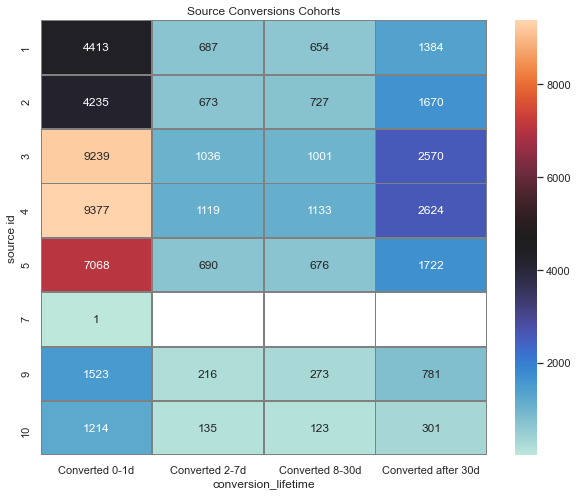

In [18]:
# Conversions by source

# use a copy for source cohorts 
orders_visits_source = orders_visits.copy()

# slice uid and source id from visits
visits_source = visits[['uid','source id']]
visits_source = visits_source.rename(columns = {'uid' : 'uid_unique'})

# merge the two dfs.
orders_visits_source = pd.merge(orders_visits_source, visits_source, on = 'uid_unique')

orders_visits_source = orders_visits_source.drop_duplicates(keep = 'first')


# group by source id and conversion lifetime
orders_visits_grouped_by_source = orders_visits_source.groupby(['source id', 'conversion_lifetime']).agg({'uid_unique':'count'}).reset_index()

# pivot table for total number of conversions in each source
orders_visits_grouped_by_sources_pivot = orders_visits_grouped_by_source.pivot_table(index='source id',columns='conversion_lifetime',values='uid_unique') 

# plot heatmap
sns.set(style='white')
plt.figure(figsize=(10, 8))
plt.title('Source Conversions Cohorts')
sns.heatmap(orders_visits_grouped_by_sources_pivot, annot=True, fmt='g', linewidths=1, linecolor='gray', cmap='icefire')


#

##### Conclusions:

- In terms of total conversions, sources no. 3 and 4 are the highest with over 9000 conversions at days 0 and 1.
- Source number 7 might need to be re-examined, showing only 1 conversion.
- There are total numbers. While they give us good background information, we need to check conversion rates. 


<div class="alert alert-success" role="alert">
Cool!
</div>


<AxesSubplot:title={'center':'Conversions Cohorts'}, xlabel='conversion_lifetime', ylabel='source id'>

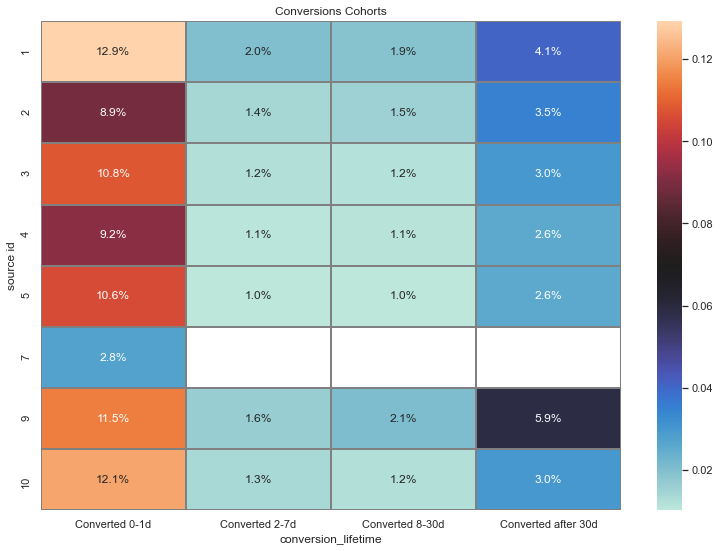

In [19]:
## Conversions by source - Conversion rates

#groupby source id and conversion lifetime
orders_visits_source_cohort = orders_visits_source.groupby(['source id','conversion_lifetime']).agg({'uid_unique': 'count'}).reset_index()


# group visits_cohort table by source id
first_visit_source = visits_cohort.groupby('source id')['uid'].count().reset_index()
first_visit_source = first_visit_source.rename(columns = {'uid' : 'total_source_users'})

# merge orders_visits_source_conversion_conversion with the date of first_visits_source
orders_visits_source_conversion_conversion_rate = pd.merge(orders_visits_source_cohort, first_visit_source, on = 'source id')

# calculate conversion rate
orders_visits_source_conversion_conversion_rate['conversion_rate'] = orders_visits_source_conversion_conversion_rate['uid_unique'] /orders_visits_source_conversion_conversion_rate['total_source_users']

# pivot table for conversion rates of each source
orders_visits_source_conversion_conversion_rate_pivot = orders_visits_source_conversion_conversion_rate.pivot_table(index = 'source id', columns = 'conversion_lifetime', values = 'conversion_rate')

# plot heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Conversions Cohorts')
sns.heatmap(orders_visits_source_conversion_conversion_rate_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='icefire')



##### Conclusions:

- Highest conversion percetnages are seen at sources number 1 and 10 with over 12% conversion rates for day0 and day1.
- Overall, all sources are charcterized with similar conversion rates, between 8.5-13%.
- Source id shows siginificant low conversion rate of 2.8%

<div class="alert alert-success" role="alert">
Also cool, hehe =)
</div>


<a class="anchor" id="222"></a>
#### - How many orders do they make during a given period of time?

In [20]:
# Calculate average transactions

# convert buy ts to date 
orders['buy ts'] = orders['buy ts'].dt.date

<AxesSubplot:title={'center':'Avg Amount of Orders'}, xlabel='cohort_lifetime_month', ylabel='first_buy_month'>

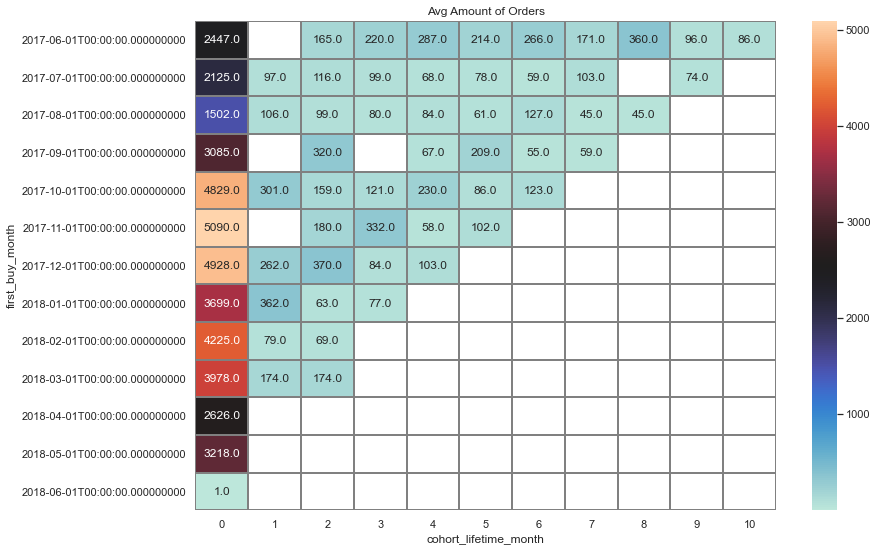

In [21]:
# Calculate average transactions

# convert buy ts to date 
first_session_date = first_session_date.rename(columns = {'start ts' : 'first_visit'})

# create a series of first purchase date
first_buy_date = orders.groupby(['uid'])['buy ts'].min()
first_buy_date.name = 'first_buy_date'

orders_first_visits = pd.merge(orders, first_session_date, on = 'uid')
#orders = orders.rename(columns = ({'start ts' : 'first_session_date'}))

orders_first_visits['first_visit'] =  pd.to_datetime(orders_first_visits['first_visit'], format = "%Y-%m-%d")

# join orders with first_buy_date
orders_first_visits = orders_first_visits.join(first_buy_date, on = 'uid')

# convert first_buy_date to time 
orders_first_visits['first_buy_date'] =  pd.to_datetime(orders_first_visits['first_buy_date'], format = "%Y-%m-%d")
#user_activity['activity_week'] = pd.to_datetime(user_activity['activity_date'], unit='d') - pd.to_timedelta(user_activity['activity_date'].dt.dayofweek, unit='d')

# add a column of purchase month 
orders_first_visits['buy_month_date'] = orders_first_visits['buy ts'].astype('datetime64[M]')

# add a column of first purchase month 
orders_first_visits['first_buy_month'] = orders_first_visits['first_buy_date'].astype('datetime64[M]')

# calculate month lifetime 
orders_first_visits['cohort_lifetime_month'] = orders_first_visits['buy_month_date'] - orders_first_visits['first_buy_month'] 
orders_first_visits['cohort_lifetime_month'] = orders_first_visits['cohort_lifetime_month'] / np.timedelta64(1, 'M')
orders_first_visits['cohort_lifetime_month'] = orders_first_visits['cohort_lifetime_month'].astype(int)

#drop duplicates
orders_first_visits = orders_first_visits.drop_duplicates(keep = 'first')

# groupby cohorts month and lifetime, count the number of orders and users
orders_cohorts = orders_first_visits.groupby(['first_buy_month', 'cohort_lifetime_month']).agg({'revenue':'count', 'uid':'count'}).reset_index()
orders_cohorts = orders_cohorts.rename(columns = {'revenue': 'orders_count'})

# groupby cohorts month and lifetime, and calculate the average amount of orders in each cohort
orders_cohorts_grouped = orders_cohorts.groupby(['first_buy_month', 'cohort_lifetime_month']).agg({'orders_count': 'mean'})


# create pivot table for order counts
orders_cohort_grouped_pivot = orders_cohorts_grouped.pivot_table(index = 'first_buy_month', columns = 'cohort_lifetime_month', values = 'orders_count')

# display heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Avg Amount of Orders')
sns.heatmap(orders_cohort_grouped_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='icefire')


<div class="alert alert-success" role="alert">
Pretty nice!
</div>


In [22]:
orders_cohorts['orders_count'].mean()

768.40625

##### Conclusions:

- The average amount of orders is 768 per month. 
- Highest amount of orders is, as expected, in the first month of each cohort.
- We see the highest amount of purchases in the first month of users who visited the site at October, November, December. the two latters include the black friday and thanksgiving holidays, as mentioned previously. 
- Major drop in orders as time progresses past the first month. Yet, we see fluctuations within the other months for all cohorts. 

<a class="anchor" id="223"></a>
#### - What is the average purchase size?

Text(0.5, 0, 'Cohort Lifetime')

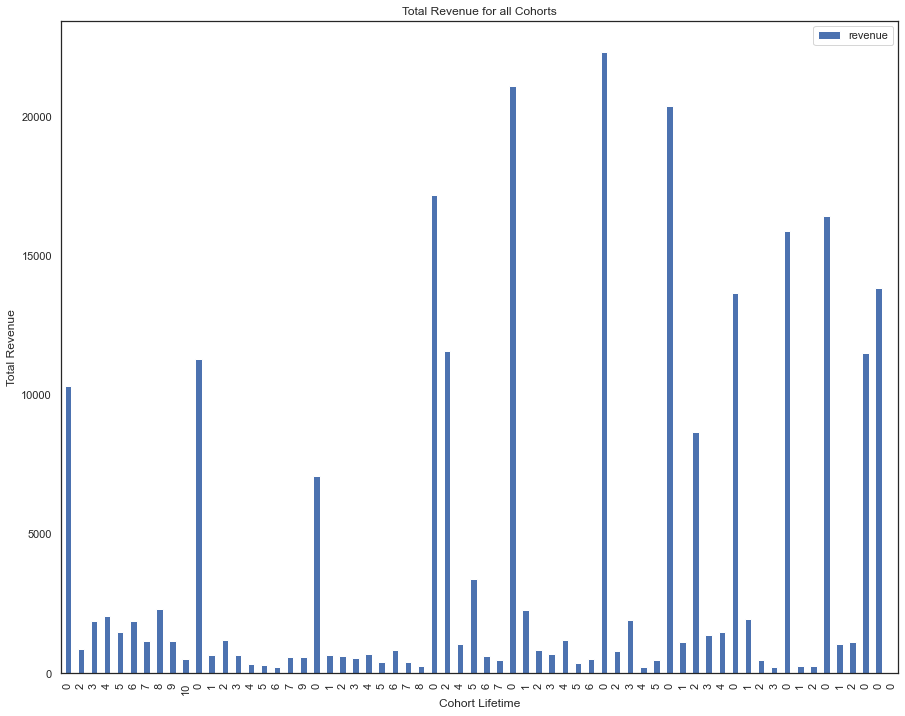

In [23]:
# build a df with cohorts months, lifetime by month, revenue and uid count
orders_cohorts_by_cohorts = orders_first_visits.groupby(['first_buy_month', 'cohort_lifetime_month']).agg({'revenue':'sum', 'uid':'count'}).reset_index()

# QA - present the total revenue for all cohorts
orders_cohorts_by_cohorts.plot(kind = 'bar', x='cohort_lifetime_month', y='revenue', figsize = (15,12))
plt.title('Total Revenue for all Cohorts')
plt.ylabel("Total Revenue",fontdict = {'size':12})
plt.xlabel("Cohort Lifetime", fontdict = {'size':12})

<div class="alert alert-warning" role="alert">
Ok, same note here -- good, but see if you can improve the informativity of the graph by enabling logscale ;)
</div>


##### Conclusions:

- All cohorts show most revenues at month 0 as expected.
- In the graph we can see each next cohort is shorter in one bar, and that numbers dercrease as expected.
- The plot shows the genreal total revenue throughout the year.

In [24]:
# conclusions:
# most people leave after the 0 month, the others are more engaged to the service and pay more on average.

6.416333584378432

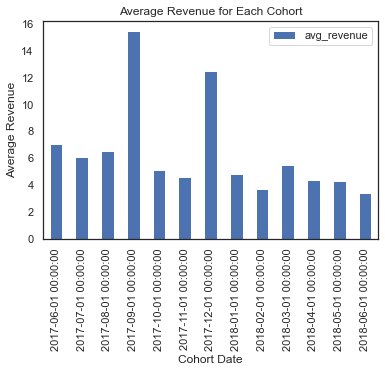

In [25]:
# Calculate average revenue for each cohort

# add average revenue column
orders_cohorts_by_cohorts['avg_revenue'] = orders_cohorts_by_cohorts['revenue'] / orders_cohorts_by_cohorts['uid']

# group by cohorts and average revenue for each of cohort.
avg_revenue_by_cohort = orders_cohorts_by_cohorts.groupby('first_buy_month').agg({'avg_revenue':'mean'}).reset_index()

# display
avg_revenue_by_cohort.plot(kind = 'bar', x = 'first_buy_month', y = 'avg_revenue')
plt.title('Average Revenue for Each Cohort')
plt.ylabel("Average Revenue",fontdict = {'size':12})
plt.xlabel("Cohort Date", fontdict = {'size':12})


# calculat all cohorts average revenue
avg_revenue_by_cohort.avg_revenue.mean()

##### Conclusions:

- The average purchase size for all cohorts is 6.4 dollars.
- Some cohorts are charcterized with higher average purchase size - 2017-12 and 2017-09 with an average higher then 12 dollars. 


cohort_lifetime_month    revenue    uid  revenue_per_cohort_month
0                       0  181102.33  36523                  4.958583
1                       1    7897.96    793                  9.959596
2                       2   26406.55    873                 30.248053
3                       3    7212.23    524                 13.763798
4                       4    6966.38    491                 14.188147
5                       5    6354.90    372                 17.083065
6                       6    4050.09    273                 14.835495
7                       7    2609.02    180                 14.494556
8                       8    2569.56    113                 22.739469
9                       9    1729.74     87                 19.882069
10                     10     519.62     53                  9.804151

Text(0.5, 0, 'Month Lifetime')

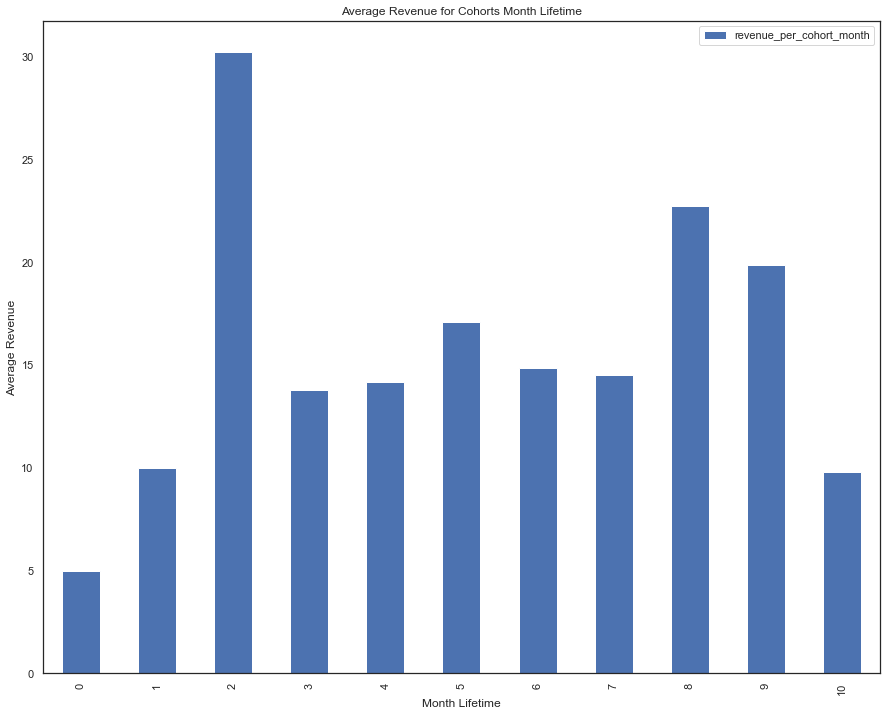

In [26]:
# now lets group all the data by the cohort lifetime to check if there is any general trend 
orders_purchase = orders_first_visits.groupby('cohort_lifetime_month').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index().sort_values(by = 'revenue', ascending= False)
orders_purchase['revenue_per_cohort_month'] = orders_purchase['revenue'] / orders_purchase['uid']
orders_purchase = orders_purchase.sort_values('cohort_lifetime_month')

# display average revenue for all cohrots lifetime month
display(orders_purchase.head(20))
orders_purchase.plot(kind = 'bar', x='cohort_lifetime_month', y='revenue_per_cohort_month', figsize = (15,12))
plt.title('Average Revenue for Cohorts Month Lifetime')
plt.ylabel("Average Revenue",fontdict = {'size':12})
plt.xlabel("Month Lifetime", fontdict = {'size':12})

##### Conclusions:

- We see that there is no clear apperent trend of average purchase and month lifetime. This is expected as each month is can be influenced by special events.
- We see that even though highest amount orders and total revenues occur at the first month, it is also charcterized by the lowest average revenus.
- User behaviour: most users who convert make small purchase amount in the first month. Those who keep buying after the first month (those who retain) - buy with higher average purchase.

<div class="alert alert-success" role="alert">
Ok, that makes sense =)
</div>


<a class="anchor" id="224"></a>
#### - How much money do they bring? (LTV)

Text(0.5, 0, 'Source ID')

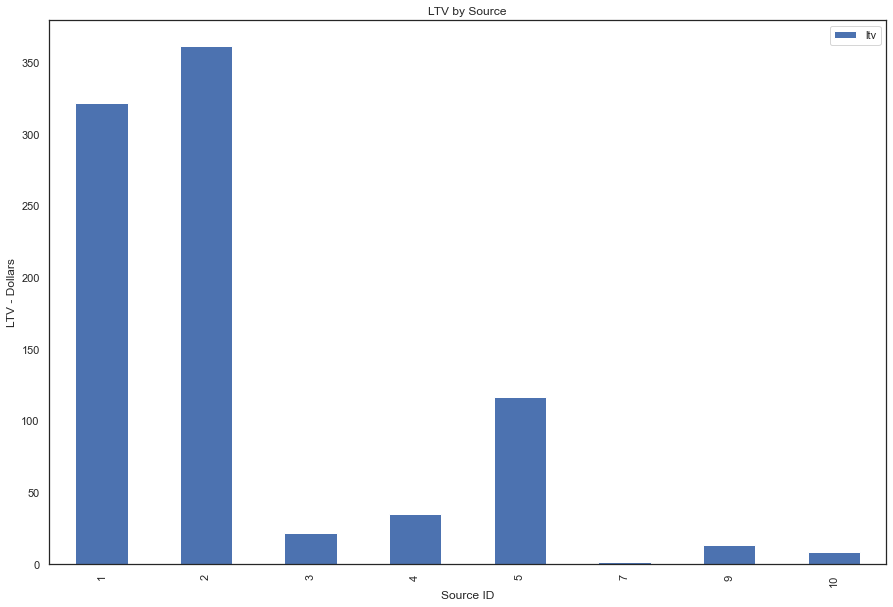

In [27]:
# ltv by source

# search for a sereis- user id and source from visits
uid_source = visits[['source id', 'uid']]

# merge user id with  orders table
orders = pd.merge(orders, uid_source, on = 'uid')

# gropuby - source id, values - number of uid nunique, and revenue - sum , reset index
orders_source_revenue = orders.groupby('source id').agg({'uid':'nunique', 'revenue': 'sum'}).reset_index()

# rename source id
orders_source_revenue = orders_source_revenue.rename(columns = {'source id': 'source_id', 'uid' : 'user_count'})

# create a ltv by source - divide revenue by uid
orders_source_revenue['ltv'] = orders_source_revenue['revenue'] / orders_source_revenue['user_count']

# display ltv by source
orders_source_revenue.plot(kind = 'bar', x='source_id', y='ltv', figsize = (15,10))
plt.title('LTV by Source')
plt.ylabel("LTV - Dollars",fontdict = {'size':12})
plt.xlabel("Source ID", fontdict = {'size':12})


##### Conclusions:

- Devices 1 and 2 show the highest LTV, with over 300 and 350, respectively.
- Devices 3,4,7,9,10 show low to non LTV.


In [28]:
orders_source_revenue

source_id  user_count       revenue         ltv
0          1        7138  2.298200e+06  321.966961
1          2        7305  2.638189e+06  361.148420
2          3       13846  2.966880e+05   21.427702
3          4       14253  4.966902e+05   34.848114
4          5       10156  1.181477e+06  116.332920
5          7           1  1.220000e+00    1.220000
6          9        2793  3.634225e+04   13.011905
7         10        1773  1.461923e+04    8.245477

<AxesSubplot:title={'center':'Orders Cohorts: LTV'}, xlabel='cohort_lifetime_month', ylabel='first_buy_month'>

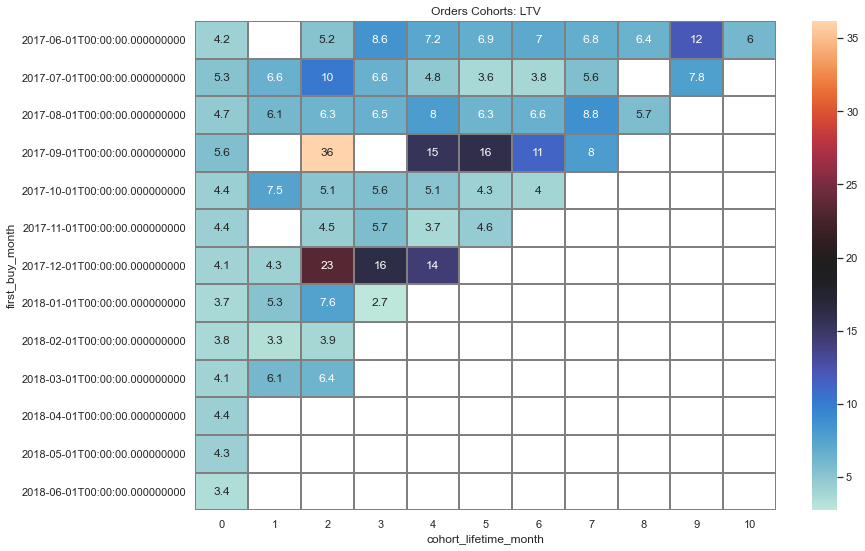

In [29]:
# ltv by cohort

# gropuby orders by month cohorts
orders_cohorts_month_revenue = orders_cohorts_by_cohorts.groupby(['first_buy_month', 'cohort_lifetime_month']).agg({'revenue': 'sum', 'uid':'sum'}).reset_index()

# calculate ltv or month cohorts
orders_cohorts_month_revenue['ltv'] = orders_cohorts_month_revenue['revenue'] / orders_cohorts_month_revenue['uid']

# pivot table for heatmap
orders_cohorts_revenue_pivot = orders_cohorts_month_revenue.pivot_table(index = 'first_buy_month', columns = 'cohort_lifetime_month', values = 'ltv')


# plot heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Orders Cohorts: LTV')
sns.heatmap(orders_cohorts_revenue_pivot, annot=True, linewidths=1, linecolor='gray', cmap='icefire')


In [30]:
orders_cohorts_month_revenue.ltv.mean()

7.138051565307368

##### Conclusions:

- We see that in general, LTV is set around 4.0-10.0.
- Some cohorts showing stronger months, for example cohort 2017-12 and cohort 2019-09 
- The average ltv is 7.13.

<div class="alert alert-success" role="alert">
Yep, those numbers look allright =)
</div>


<a class="anchor" id="23"></a>
### 3. Marketing
- How much money was spent? Overall/per source/over time
- How much did customer acquisition from each of the sources cost?
- How worthwhile where the investments? (ROI)

<a class="anchor" id="231"></a>
#### - How much money was spent? Overall/per source/over time

Text(0.5, 0, 'Source ID')

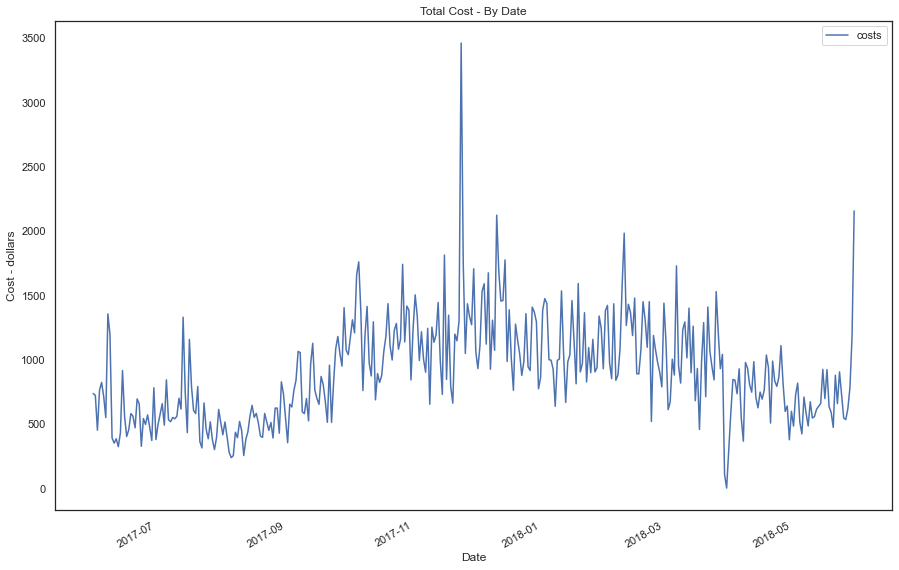

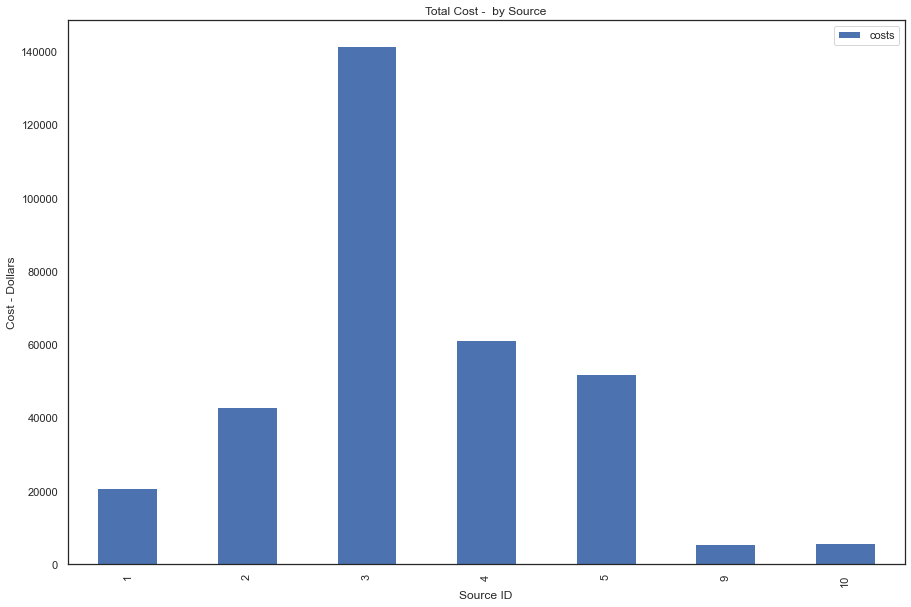

In [31]:
# overtime
costs_by_dt = costs.groupby('dt')['costs'].sum().reset_index()
costs_by_dt.plot(kind = 'line', x='dt', y='costs', figsize = (15,10))
plt.title('Total Cost - By Date')
plt.ylabel("Cost - dollars",fontdict = {'size':12})
plt.xlabel("Date", fontdict = {'size':12})

# by source
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.plot(kind = 'bar', x='source_id', y='costs', figsize = (15,10))
plt.title('Total Cost -  by Source')
plt.ylabel("Cost - Dollars",fontdict = {'size':12})
plt.xlabel("Source ID", fontdict = {'size':12})


##### Conclusions:

- Highest cost by date expenses correlates  the dau graph, with highest peak at the end of November.
- Sources: The most expensive cost for marketing was for source number 3, more then double of the other sources.
- Source no 7. had no marketing expenses, this can explains why there is no revenue from this source. 
- Low costs for sources no. 1 and 2, yet these source are charcterized by high LTV and conversion rate. 

<div class="alert alert-warning" role="alert">
Ok, same minor note here:
    
    cost by date expenses correlates the dau graph
That's a good observation, but if you claim something like that -- don't forget to support your opinion with graphs. Two lines correlate -- plot them on the same figure. Especially when one of them is in the beginning of the project and the other is near the end.
</div>


<a class="anchor" id="232"></a>
#### - How much did customer acquisition from each of the sources cost? (CAC)

source_id      costs  user_count       cac
0          1   20833.27       18999  1.096546
1          2   42806.04       26245  1.631017
2          3  141321.63       74756  1.890439
3          4   61073.60       83525  0.731201
4          5   51757.10       56974  0.908434
5          9    5517.49        9264  0.595584
6         10    5822.49        8067  0.721766

Text(0.5, 0, 'Source id')

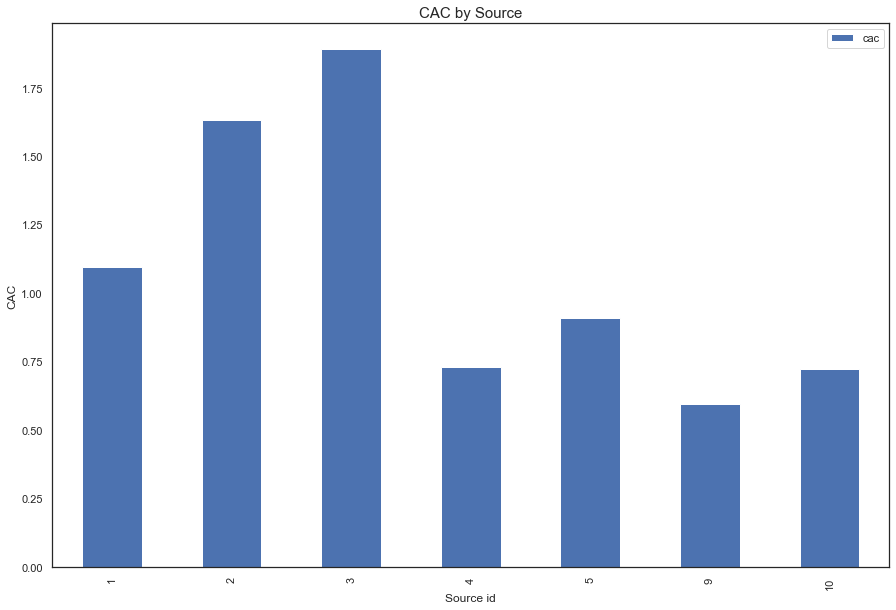

In [32]:
# CAC by source

# visits by source
visits_by_source = visits.groupby('source id').agg({'uid': 'nunique'}).reset_index()
visits_by_source = visits_by_source.rename(columns = {'source id' : 'source_id', 'uid' : 'user_count'})

# merge visits and costs by source
costs_by_source_users = pd.merge(costs_by_source, visits_by_source, on = 'source_id')

# calculate CAC by source
costs_by_source_users['cac'] = costs_by_source_users['costs'] / costs_by_source_users['user_count'] 

# display CAC by source
display(costs_by_source_users)

# plot CAC by source
costs_by_source_users.plot(kind = 'bar', x='source_id', y='cac', figsize = (15,10))
plt.title("CAC by Source", fontdict = {'size':15})
plt.ylabel("CAC",fontdict = {'size':12})
plt.xlabel("Source id", fontdict = {'size':12})




##### Conclusions:

- Highest CAC sources are  No. 2 and 3.
- Sources No. 1-3 - CAC > 1.
- Sources 4,5,8,10 - CAC < 1.

<div class="alert alert-success" role="alert">
Ok, very nice =)
</div>

In [33]:
######## CAC by cohorts ######

costs_copy = costs.copy()
costs_copy['dt'] = pd.to_datetime(costs['dt'], format = "%Y-%m-%d")

# cost month
costs_copy['date_month'] = costs_copy['dt'].astype('datetime64[M]')

#gropuby month, costs per each month sum, dt = id for the order. count number of dt in each month, reset index 
costs_by_month = costs_copy.groupby('date_month').agg({'dt' : 'count', 'costs': 'sum'}).reset_index()

costs_by_month = costs_by_month.rename(columns = ({'dt': 'No. of users'}))

# creat a new column - cac .
costs_by_month['cac'] = costs_by_month['costs'] / costs_by_month['No. of users']

display(costs_by_month)
display(costs_by_month.cac.mean())

date_month  No. of users     costs         cac
0  2017-06-01           210  18015.00   85.785714
1  2017-07-01           217  18240.59   84.058018
2  2017-08-01           217  14790.54   68.159171
3  2017-09-01           210  24368.91  116.042429
4  2017-10-01           217  36322.88  167.386544
5  2017-11-01           210  37907.88  180.513714
6  2017-12-01           217  38315.35  176.568433
7  2018-01-01           217  33518.52  154.463226
8  2018-02-01           196  32723.03  166.954235
9  2018-03-01           211  30415.27  144.148199
10 2018-04-01           203  22289.38  109.799901
11 2018-05-01           217  22224.27  102.415991

129.69129790459823

##### Conclusions:

- CAC is the highest for months Oct, Nov and Dec.
- The first cohorts show the lowest cac - Jun, Jul and Aug.
- The average CAC for cohorts is 129 dollars.


In [34]:
# CAC by cohort

# groupby month 
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month').sum()

# merge orders_cohorts revenue and monthly costs 
report_ = pd.merge(orders_cohorts_month_revenue, monthly_costs, left_on='first_buy_month', right_on='month')
report_['cac'] = report_['costs'] / report_['uid']


<AxesSubplot:title={'center':'Orders Cohorts: CAC'}, xlabel='cohort_lifetime_month', ylabel='first_buy_month'>

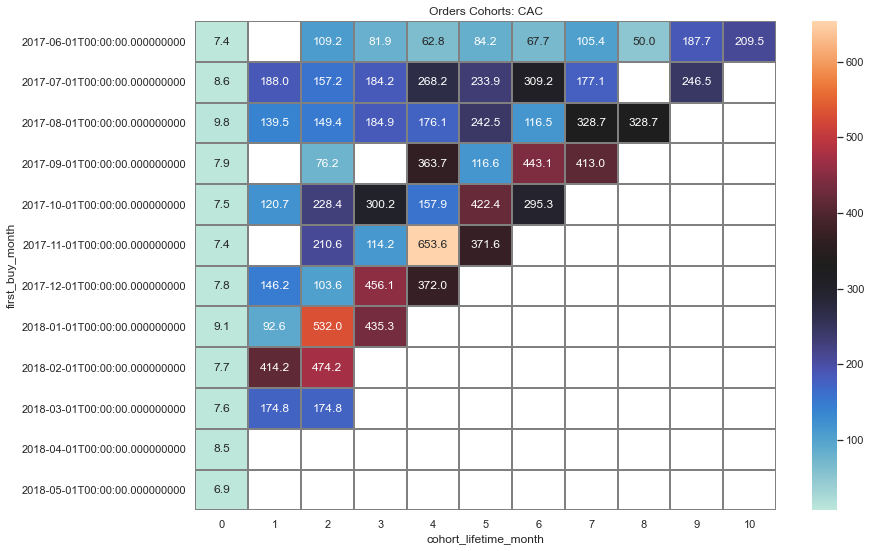

In [35]:
# gropuby cohort month and lifetime, calculate average cac
report_cac_cohorts = report_.groupby(['first_buy_month', 'cohort_lifetime_month']).agg({'cac':'mean'})

# pivot table for heatmap
report_cac_cohorts_pivot = report_cac_cohorts.pivot_table(index = 'first_buy_month', columns = 'cohort_lifetime_month', values = 'cac')

# display heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Orders Cohorts: CAC')
sns.heatmap(report_cac_cohorts_pivot, annot=True, fmt = '.1f',linewidths=1, linecolor='gray', cmap='icefire')



##### Conclusions:
- We see that CAC expenses becomes higher as time progess in all cohorts. 
- This is supported by previous analysis- total cost by date stays relatively similar, while retention, total amount of orders and revenue decrease.

<div class="alert alert-success" role="alert">
And now it all comes together -- perfect! =)
</div>

<a class="anchor" id="233"></a>
#### - How worthwhile where the investments? (ROI)

source_id  user_count_orders       revenue         ltv      costs  \
0          1               7138  2.298200e+06  321.966961   20833.27   
1          2               7305  2.638189e+06  361.148420   42806.04   
2          3              13846  2.966880e+05   21.427702  141321.63   
3          4              14253  4.966902e+05   34.848114   61073.60   
4          5              10156  1.181477e+06  116.332920   51757.10   
5          9               2793  3.634225e+04   13.011905    5517.49   
6         10               1773  1.461923e+04    8.245477    5822.49   

   user_count_costs       cac         roi  
0             18999  1.096546  293.619307  
1             26245  1.631017  221.425301  
2             74756  1.890439   11.334778  
3             83525  0.731201   47.658706  
4             56974  0.908434  128.058794  
5              9264  0.595584   21.847305  
6              8067  0.721766   11.424023

Text(0.5, 0, 'Source ID')

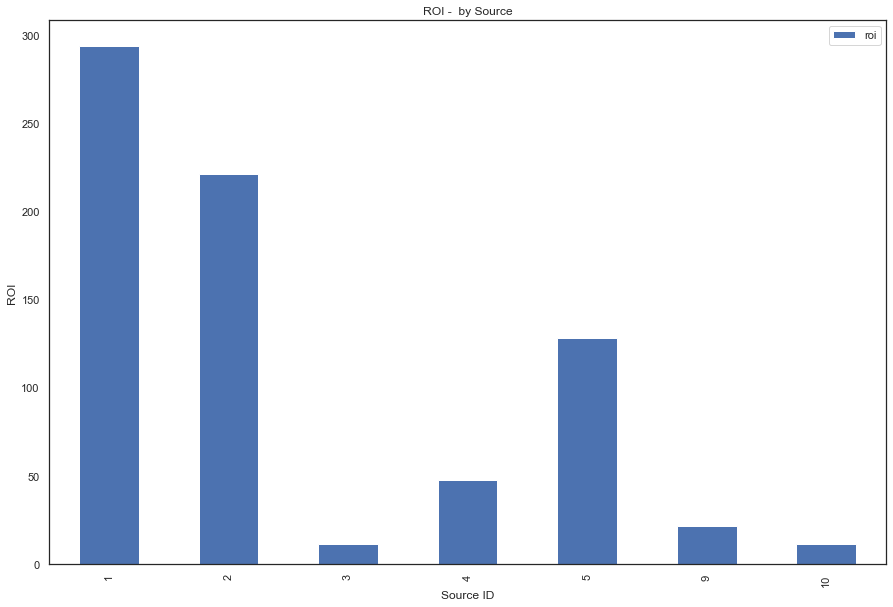

In [36]:
# ROI by source

# merge orders by source and costs by source 
roi_source = pd.merge(orders_source_revenue,costs_by_source_users, on = 'source_id')

# rename columns
roi_source = roi_source.rename(columns = {'user_count_x' : 'user_count_orders', 'user_count_y' : 'user_count_costs'})

# calculate roi by source
roi_source['roi'] = roi_source['ltv'] / roi_source['cac']

# display table and heatmap
display(roi_source)

roi_source.plot(kind = 'bar', x='source_id', y='roi', figsize = (15,10))
plt.title('ROI -  by Source')
plt.ylabel("ROI",fontdict = {'size':12})
plt.xlabel("Source ID", fontdict = {'size':12})

##### Conclusions:

- Highest ROI are from source No. 1 and 2.
- Very low ROI from source 3,9,10
- No ROI from source No 7.

In [37]:
# # ROI by cohort

# roi by cohort
report_['roi'] = report_['ltv'] / report_['cac']

# create pivot table
output = report_.pivot_table(
    index='first_buy_month', 
    columns='cohort_lifetime_month', 
    values='roi', 
    aggfunc='mean')

# cumulative sum for cumulative roi
output = output.cumsum(axis=1).round(2) 

<AxesSubplot:title={'center':'Orders Cumulative ROI by cohorts'}, xlabel='cohort_lifetime_month', ylabel='first_buy_month'>

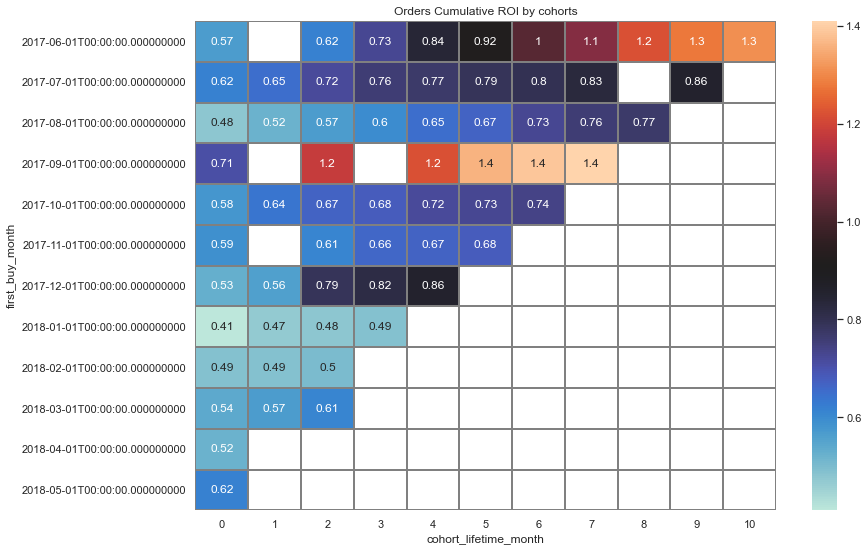

In [38]:
# plot heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Orders Cumulative ROI by cohorts')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray', cmap='icefire')


<div class="alert alert-success" role="alert">
Your ROI numbers seem to be correct -- which is a rare sight on this project =) Good job!
</div>

##### Conclusions:
- Cohort 2017-06 paid off at the 7th month.
- Cohort 2017-09 paid off at the 3rd month
- The rest of the cohorts are still not profitable, but show steady increase in ROI with months progression.
- From the first 5 cohorts we can see that ROI passes 0.7 by the end of the 6th month lifetime. 
- In general, is is questionable if all cohorts will be paid off in the first year, they most likely will be very close to reaching profit. 


<a class="anchor" id="4"></a>
## 4. Overall Conclusion 


- Most noticable revenue occured at the end of November, during Black Friday and Thanksgiving. This means we should try to extract more profit from these events as they generate a lot of traffic. 
- all roi are positive


- There are more enteried from Desktop Users, and their average session is shorter then on touch device. This is a reasonable result, and doesn't necessery means good/bad results.


- Sources no. 1 and 2 are charcterized by low costs,  yet these source are charcterized by high LTV and conversion rate. It is recommended to condiser increase in marketing expenses for those sources.


- We see retention rate is about ~5-6% in all cohorts and that retention rate decrease steadly towards the last lifetime month in each cohort. this is normal, yet, as the year progress, each new cohort shows lower retentionrate at its last updated lifetime, Dropping from 4.5% and 4.9% at the first 2 cohorts, to ~2.0% in the last cohorts. On teh oposite side, there is a steady increase in coversion rates of day0 and day1, from 4.5% in the first cohort to over 12% in the last cohort.
- One possible interpretation - Users are aware of our serivce and it attracts more delibirate costumers. 


- Conversion rate drops to below 1% in the other conversion lifetime. Those who didn't convert in 0-1day, unlikely to convert at all. We should put emphasis on customers on their first day of visit and use a more aggressive marketing approach, maybe speical sales with limited time offer.


- User behaviour: most users who convert make small purchase amount in the first month. Those who keep buying after the first month (those who retain) - buy with higher average purchase. 
    
### Bottom Line

#### In order to opetmize marketing expenses: 
- It is recommended to focus more on Sources 1 and 2.
- Drop the marketing expenses for sources 3, 9, 10.
- Build a marketing strategy for source no. 7 and test it.




<div class="alert alert-success" role="alert">
Very logical and detailed final conclusions -- excellent job! =)
</div>